## Introdução

Vamos utilziar o Algoritimo Groover para resolver o problema do sudoku 2D.Para isso, vamos discutir como funciona o a física do Algoritimo. Para entender melhor, vamos discutir. 


**Circuito Quantico :**

Um circuito quântico é um sistema que utiliza operadores em estados quânticos, também conhecidos como qubits, para processar informações. Esses operadores são organizados em sequências, formando um circuito, que é projetado para produzir resultados específicos. O circuito quântico pode ser utilizado para resolver problemas complexos, tais como simulações de sistemas quânticos, fatorização de números inteiros e otimização de funções. O sucesso do circuito quântico depende da habilidade em projetar a sequência correta de operadores e de evitar erros causados por decoerência ou outros fatores externos. 

**Como Resolver o problema do Sudoku 2D utilizando Ciruitos Quânticos?**

Antes de discutirmos a solução, é importante entender o problema. O Sudoku 2D é uma versão simplificada do sudoku tradicional, onde o objetivo do jogo é preencher todas as células com valores binários (0 ou 1), de modo que cada linha e cada coluna contenham apenas um valor binário exclusivo. Em outras palavras, cada número binário em uma linha deve ser diferente dos outros números binários nessa mesma linha, assim como em cada coluna.



![texto alternativo da imagem]( A-solved-Binary-Puzzle-game.png)


Vamos fazer uma versão reduzida desse problema, com apenas 2 dimensões Utilizando o Algoritmo groover.


**Funcionamento do Algoritimo Groover**

O algoritmo de Grover é um algoritmo quântico conhecido por sua capacidade de encontrar um elemento específico em uma lista com mais eficiência do que buscadores clássicos. Sua lógica consiste em duas etapas: dado um estado inicial de qubits, o algoritmo marca o estado de interesse, adicionando uma fase, e, em seguida, aplica a técnica de inversão da média para aumentar a amplitude de probabilidade do estado marcado. A aplicação da fase é feita através do oráculo, que identifica o estado de interesse e aplica uma fase negativa, enquanto a inversão da média é aplicada para aumentar a probabilidade de medir o estado marcado, tornando-o mais provável do que qualquer outro estado não marcado. Ao repetir essas etapas várias vezes, a probabilidade de medir o estado de interesse se aproxima de 1, permitindo que ele seja identificado com alta confiança.


**Como utilizar o Algoritmo Groover para resolver o problema do sudoku binario?**

Para utilizar o Algoritmo Grover para resolver o problema do Sudoku binário, é necessário criar um oráculo capaz de identificar os estados correspondentes às soluções do Sudoku binário. Isso pode ser feito construindo um circuito quântico que, para cada possível solução, aplique uma fase negativa no estado correspondente. Em seguida, é preciso aplicar o operador de difusão para amplificar a amplitude do estado marcado.

In [2]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,Aer,assemble, execute
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

from qiskit.extensions import RXGate, XGate, CXGate

**Como criar uma maneira de verificar se os estados correspondem a uma solução?**
Como este é um primeiro modelo, vamos simplificar as regras citadas a cima por questões pedagógicas. Vamos permitir solução do sudoku apenas das seguitnes maneiras:

- Nenhuma coluna pode conter o mesmo valor duas vezes.
- Nenhuma linha pode conter o mesmo valor duas vezes.

Então uma forma de criar essa regras é verificando se dois estados tem o mesmo valor, ou se são diferentes. Podemos fazer isso da seguinte maneira :

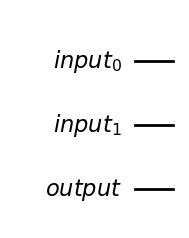

In [35]:
#primeiro vamos criar o circuito quanticos.
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
qc.draw('mpl')

Para verificar se dois estados quânticos são iguais, é possível utilizar um terceiro estado como controle. Se os dois primeiros estados forem iguais, então o terceiro estado terá um comportamento específico, caso contrário, o terceiro estado terá um comportamento diferente. Sendo assim, podemos aplicar o raciocinio do XOR para expressar essa ideia quanticamente e fazemos isso através de portas CNOT.

In [9]:
# Como iremos fazer isso rpa uma quantidade maior de quibits pe melhor criar uma função
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

In [36]:
#Aplicando a porta XOR
XOR(qc,in_qubits[0],in_qubits[1],out_qubit[0])

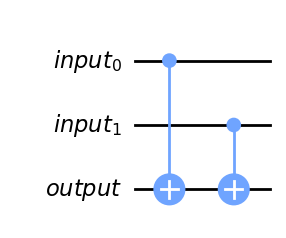

In [37]:
qc.draw('mpl')

Como precisamos verificar isso para cada celula, precisamos dar um jeito de ampliar essa verificação adicionando mais quibits

In [45]:
#Criando registros par ao circuito
var_qubits = QuantumRegister(4, name='v')  # quibits variaveis
Verificador_qubits = QuantumRegister(4, name='c')  # Quibits para fazer a verificação
Salvar_qubit = QuantumRegister(1, name='out') # Quibit para "verificar" a solução completa

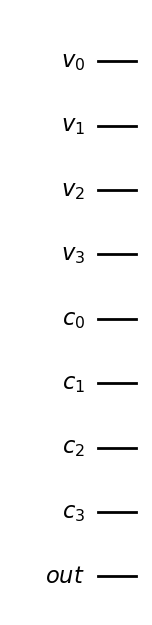

In [46]:
# Criando o circuito com os respectivos registros 
qc = QuantumCircuit(var_qubits, Verificador_qubits, Salvar_qubit)
qc.draw('mpl')

Precisamos replicar o raciocinio do circuito passado para este, dessa forma podemos criar uma lista que nos permite criar uma regra de iteração sobre ela

In [41]:
Lista_de_iteracao = [[0,1],[0,2],[1,3],[2,3]]

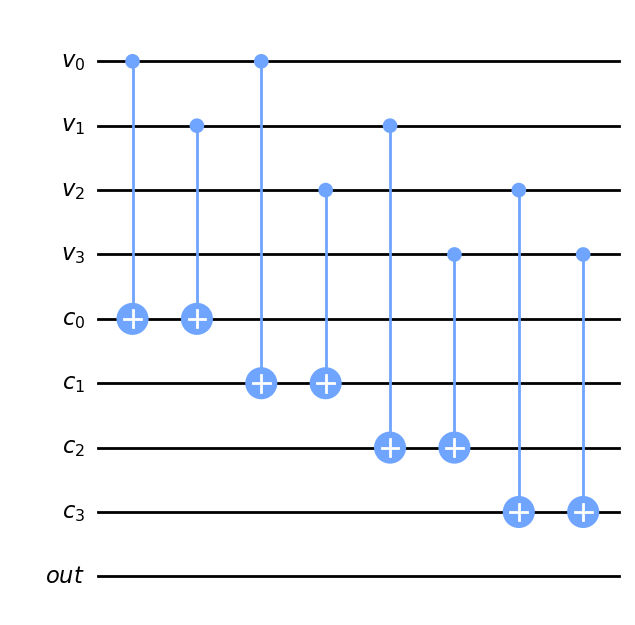

In [50]:
#Aplicando o Xor gate para o sistema, vamos obter o seguinte circuito
for i,iteracao in enumerate(clause_list):
    XOR(qc, iteracao[0], iteracao[1], Verificador_qubits[i])

qc.draw('mpl')

para completar nosso circuito de verificação, queremos que um único bit seja 1 se (e somente se) todas as cláusulas forem satisfeitas. Dessa forma temos que:

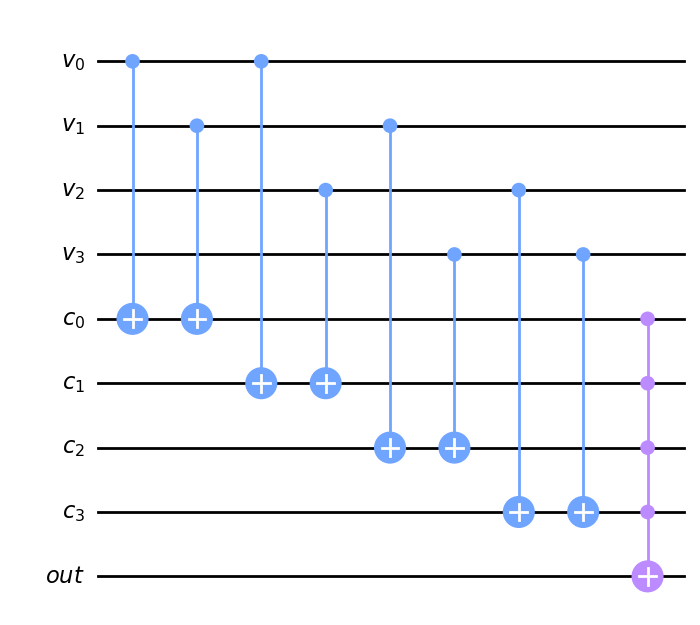

In [51]:
qc.mct(Verificador_qubits,Salvar_qubit)
qc.draw('mpl')

Aqui tem uma questão muito importante, se o estadou $|out\rangle$ for preparado em um estado especififico. A aplicação desse sistema pode causar um efeito de phase kick-back, aplicando um fase global -1 em todo o sistema( isto irá acontecer quando out = $|-\rangle$). Dessa maneira, podemos marcar os estados $|v\rangle$ que são solução do sistema. Por ultimo, é importante que a gente descompute os estados verificadores, para que possamos operar o algoritimo groover mais de uma vez. Sendo assim, temos que :

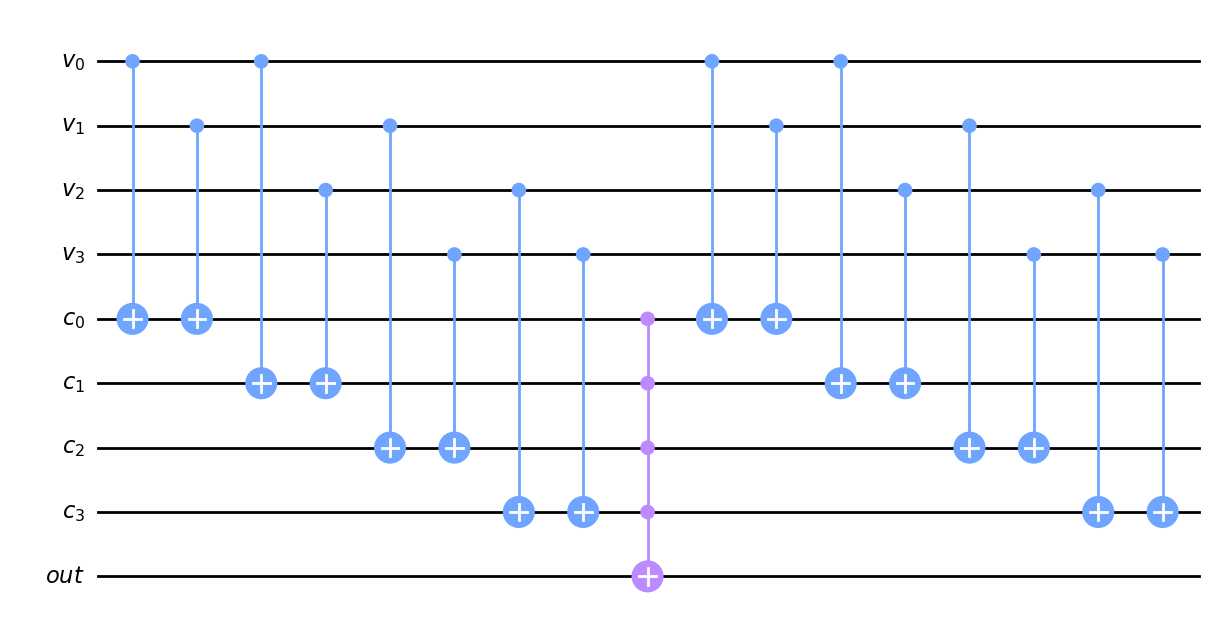

In [52]:
for i,iteracao in enumerate(clause_list):
    XOR(qc, iteracao[0], iteracao[1], Verificador_qubits[i])

qc.draw('mpl')

Para Criar a Função Difuser, eu utilizo o mesmo raciocinio feito na referência [1]. Conto mais em detalhes no meu projeto de procurar elementos em uma lista (que ainda não esta pronto)

In [54]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Aplicando a transformação |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Aplicando a transformação |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Fazendo o multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Aplicando a transformação |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Aplicando a transformação|00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

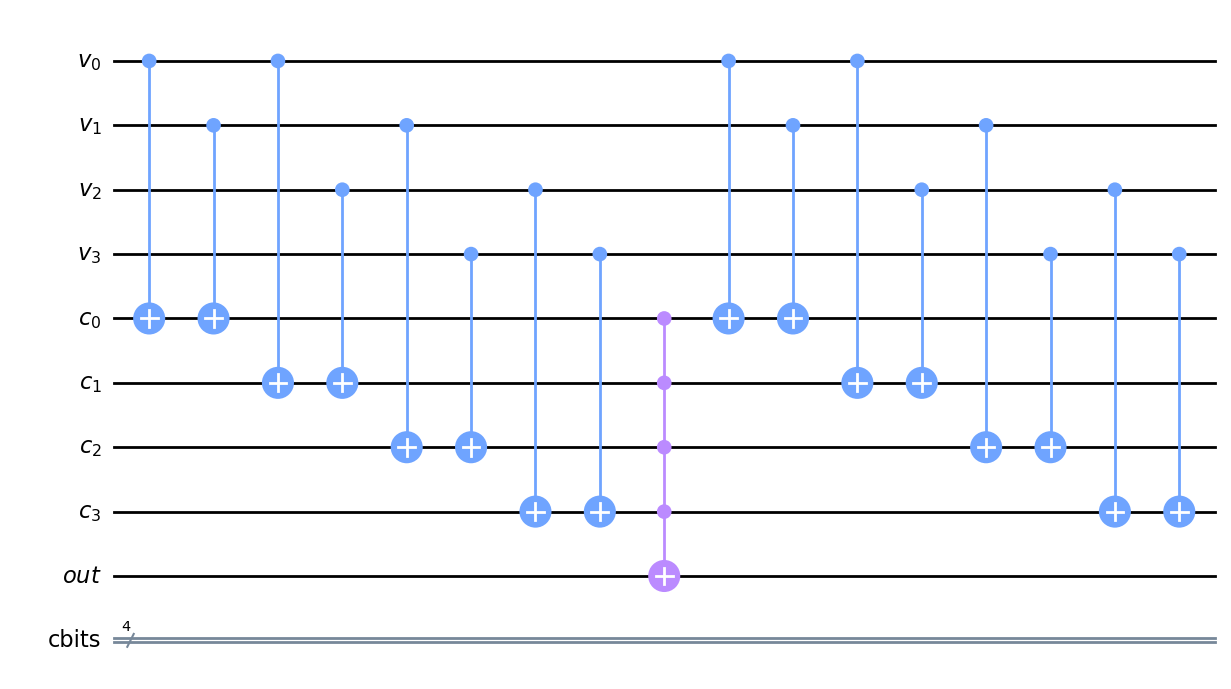

In [57]:
#Criando Oraculo 
var_qubits = QuantumRegister(4, name='v')
Regra_qubits = QuantumRegister(4, name='c')
Output_qubit = QuantumRegister(1, name='out')
Classico_quibit = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, Regra_qubits, Output_qubit, Classico_quibit)

def sudoku_oracle(qc, Lista_de_iteracao, Regra_qubits):
    
    #Computado os estados
    
    for i,iterador in enumerate(Lista_de_iteracao):
        XOR(qc, iterador[0], iterador[1], Regra_qubits[i])
        

    # Flipando o estado se todas as regras forem satisfeitas
    qc.mct(Regra_qubits, Salvar_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for i,iterador in enumerate(Lista_de_iteracao):
        XOR(qc, iterador[0], iterador[1], Regra_qubits[i])
        

sudoku_oracle(qc, Lista_de_iteracao, Regra_qubits)
qc.draw('mpl')

Sendo Assim, o código completo fica:

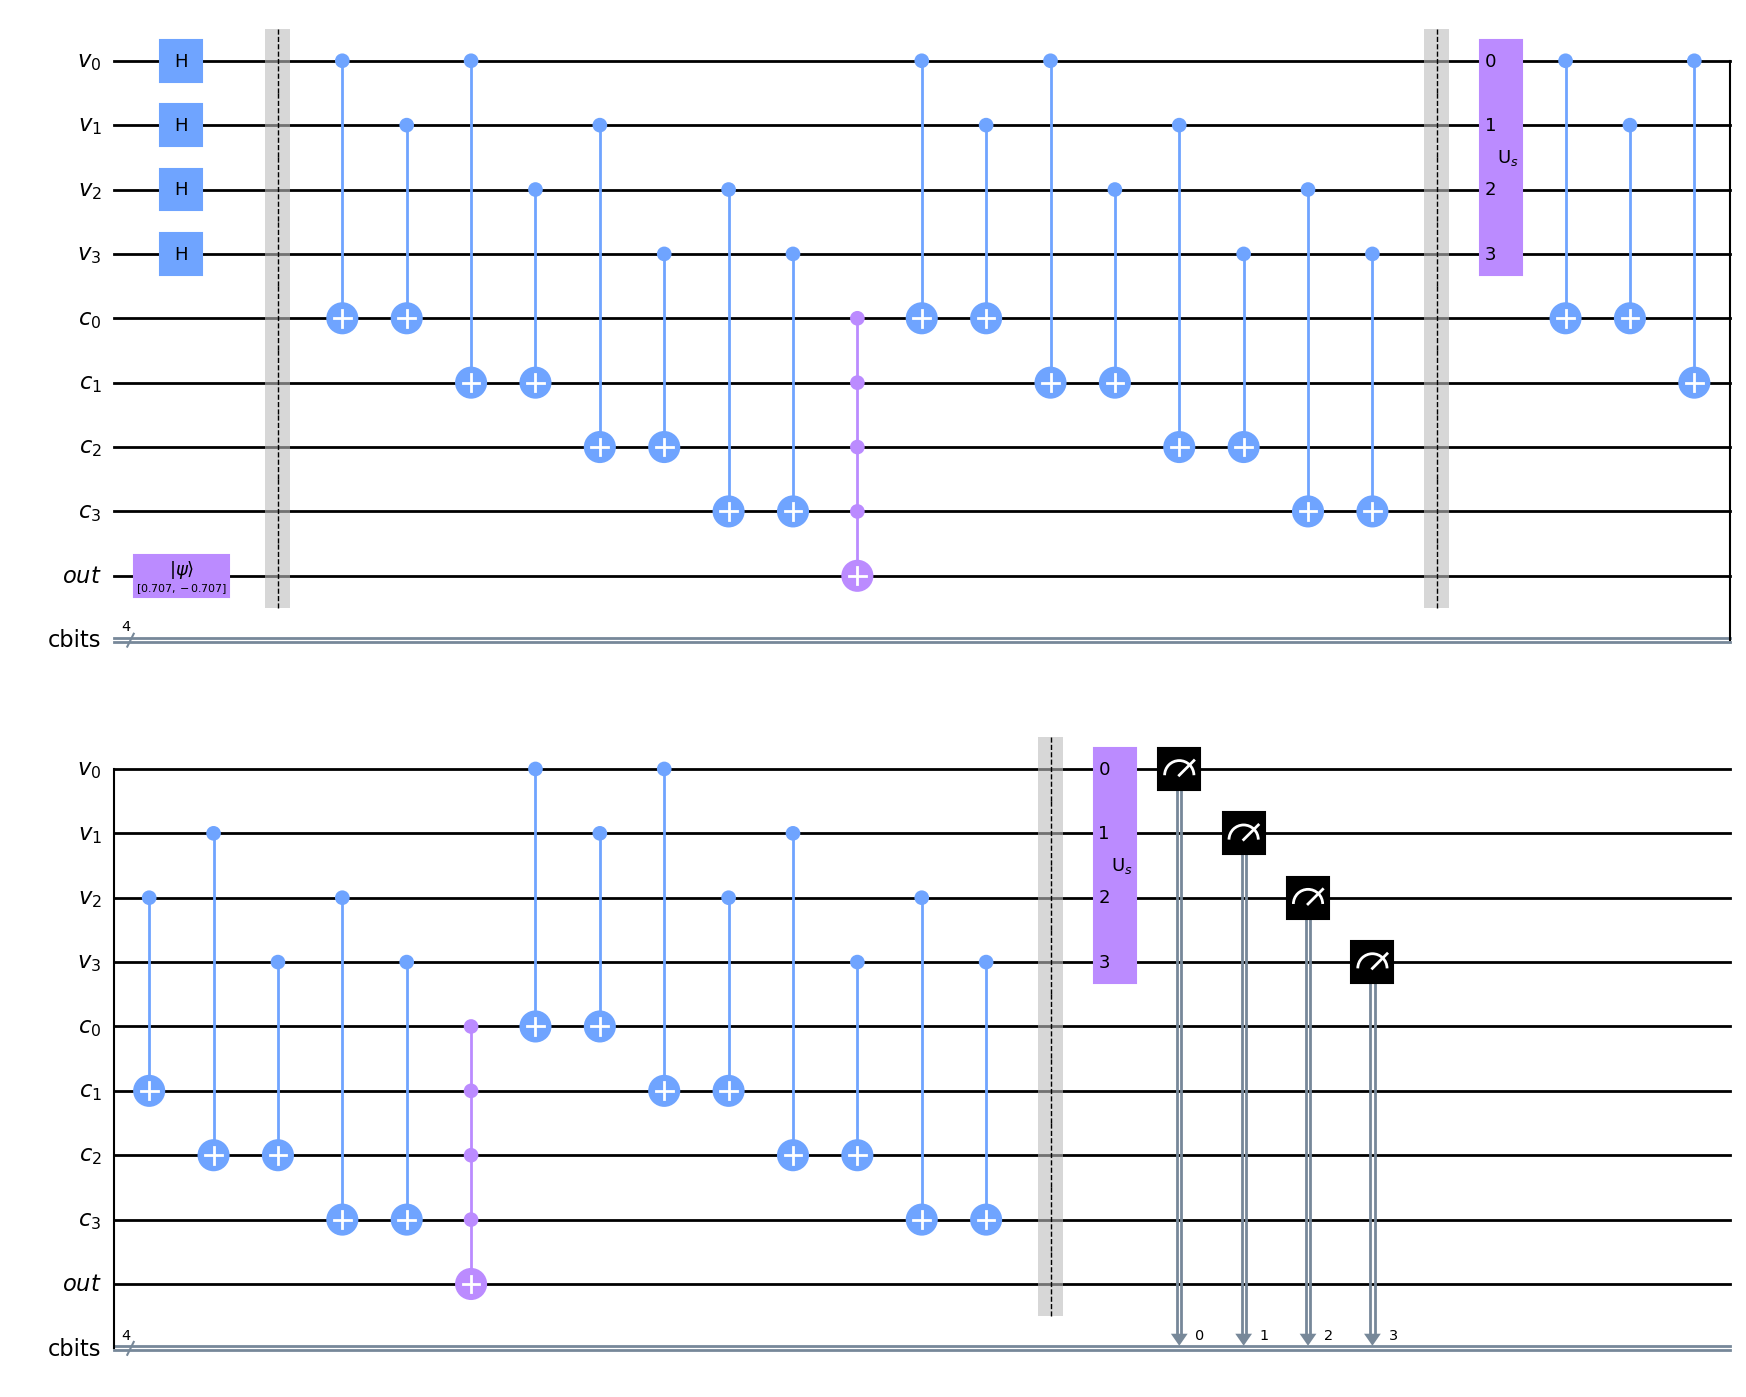

In [61]:
var_qubits = QuantumRegister(4, name='v')
Regra_qubits = QuantumRegister(4, name='c')
Output_qubit = QuantumRegister(1, name='out')
Classico_quibit = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, Regra_qubits, Output_qubit, Classico_quibit)


# Iniciando o Output_qubit no state |->
qc.initialize([1, -1]/np.sqrt(2), Output_qubit)

# Colocando os Quibits variaveis em superposição
qc.h(var_qubits)
qc.barrier()  # Apenas para visualização

## Primeira Iteração

# Aplicando o Oraculo
sudoku_oracle(qc, Lista_de_iteracao, Regra_qubits)
qc.barrier()  # Apenas para visualização, novamente.

# Aplicando o Operador Difsão
qc.append(diffuser(4), [0,1,2,3])

## Segunda Iteração
sudoku_oracle(qc, Lista_de_iteracao, Regra_qubits)
qc.barrier() 
qc.append(diffuser(4), [0,1,2,3])

# Medindo as variaveis
qc.measure(var_qubits, Classico_quibit)

qc.draw('mpl')

Podemos agora simular esse circuito quantico no aer_simulator e verificar, e verificar o histograma para 10000 simulações

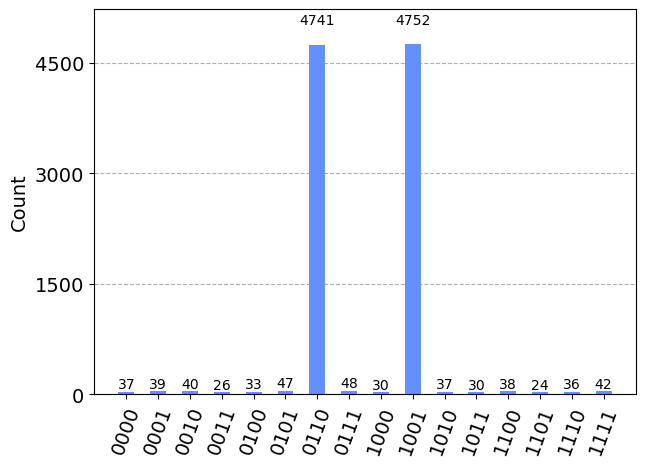

In [64]:
aer_simulator = Aer.get_backend('aer_simulator')
qobj = assemble(transpile(qc, aer_simulator), shots=10000)
result = aer_simulator.run(qobj).result()
plot_histogram(result.get_counts())


Ou seja, nosso Sudoku Binário pode ser resolvido por:

$v_0 = 0$, $v_1 = 1$, $v_2 = 1$, $v_3 = 0$ 

$v_0 = 1$, $v_1 = 0$, $v_2 = 0$, $v_3 = 1$